### Importing all the files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline
import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
file_list=["fund_specs.csv","other_specs.csv","return_3year.csv",
           "return_5year.csv","return_10year.csv","bond_ratings.csv",
           "fund_allocations.csv","fund_config.csv","fund_ratios.csv","sample_submission.csv"]

In [3]:
fund_specs = pd.read_csv(file_list[0])
other_specs= pd.read_csv(file_list[1])
return_3year= pd.read_csv(file_list[2])
return_5year= pd.read_csv(file_list[3])
return_10year= pd.read_csv(file_list[4])
bond_ratings= pd.read_csv(file_list[5])
fund_allocations= pd.read_csv(file_list[6])
fund_config= pd.read_csv(file_list[7])
fund_ratios= pd.read_csv(file_list[8])
rating = pd.read_csv(file_list[9])

In [4]:
fund_specs.dtypes

investment_class      object
currency              object
total_assets         float64
yield                float64
greatstone_rating    float64
inception_date        object
tag                    int64
fund_size             object
return_ytd           float64
dtype: object

In [5]:
fund_specs.head(2)

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79


In [6]:
fund_specs['investment_class'].unique()

array(['Value', 'Growth', 'Blend', nan], dtype=object)

In [7]:
fund_specs['investment_class'].isna().sum()

1480

In [8]:
fund_specs['fund_size'].unique()

array(['Large', nan, 'Medium', 'Small'], dtype=object)

In [9]:
fund_specs['fund_size'].isnull().sum()

1480

In [10]:
for col in ['investment_class', 'fund_size']:
    fund_specs[col] = fund_specs[col].astype('category')

In [11]:
fund_specs.shape

(25000, 9)

In [12]:
other_specs.dtypes

2014_category_return                 float64
2012_return_category                 float64
years_up                             float64
2018_return_category                 float64
tag                                    int64
category_return_1year                float64
cash_percent_of_portfolio            float64
pc_ratio                              object
2011_return_category                 float64
ytd_return_fund                      float64
years_down                           float64
2014_return_fund                     float64
category_return_1month               float64
2013_return_fund                     float64
fund_return_3months                  float64
ytd_return_category                  float64
pb_ratio                             float64
2017_category_return                 float64
1_year_return_fund                   float64
pe_ratio                              object
2015_return_fund                     float64
portfolio_convertable                float64
3_months_r

In [13]:
other_specs.shape

(25000, 43)

In [14]:
other_specs['pc_ratio'].isnull().sum()

114

In [15]:
other_specs['pc_ratio'] = other_specs['pc_ratio'].str.replace(',', '').astype(float)

In [16]:
other_specs['pc_ratio'].dtypes

dtype('float64')

In [17]:
other_specs['pe_ratio'].isnull().sum()

114

In [18]:
other_specs['pe_ratio'] = other_specs['pe_ratio'].str.replace(',', '').astype(float)

In [19]:
other_specs['mmc'].head(2)

0    19,857.41
1    72,347.03
Name: mmc, dtype: object

In [20]:
other_specs['mmc'].isnull().sum()

114

In [21]:
other_specs['mmc'] = other_specs['mmc'].str.replace(',', '').astype(float)

In [22]:
other_specs['ps_ratio'].head(2)

0    1.31
1    3.38
Name: ps_ratio, dtype: object

In [23]:
other_specs['ps_ratio'].isnull().sum()

114

In [24]:
other_specs['ps_ratio'] = other_specs['ps_ratio'].str.replace(',', '').astype(float)

In [25]:
other_specs.shape

(25000, 43)

In [26]:
return_3year.head(2)

,tag,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category
0,67922,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36
1,134783,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35


In [27]:
return_3year.dtypes

tag                                      int64
3yrs_treynor_ratio_fund                 object
3_years_alpha_fund                     float64
3years_category_std                    float64
3yrs_sharpe_ratio_fund                 float64
3yrs_treynor_ratio_category            float64
3_years_return_mean_annual_fund        float64
fund_beta_3years                       float64
3years_fund_r_squared                  float64
3years_fund_std                        float64
category_beta_3years                   float64
fund_return_3years                     float64
3_years_alpha_category                 float64
3_years_return_mean_annual_category    float64
3yrs_sharpe_ratio_category             float64
3years_category_r_squared              float64
3_years_return_category                float64
dtype: object

In [28]:
return_3year['3yrs_treynor_ratio_fund'].isna().sum()

1648

In [29]:
return_3year['3yrs_treynor_ratio_fund'] = return_3year['3yrs_treynor_ratio_fund'].str.replace(',', '').astype(float)

In [30]:
return_5year.head(2)

,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,tag,5_years_return_category
0,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,67922,-4.25
1,0.86,0.89,0.34,90.11,12.4,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,134783,11.26


In [31]:
return_5year.dtypes

category_r_squared_5years              float64
5yrs_sharpe_ratio_fund                 float64
5_years_alpha_fund                     float64
5years_fund_r_squared                  float64
5years_fund_std                        float64
5yrs_sharpe_ratio_category             float64
5_years_beta_fund                      float64
5yrs_treynor_ratio_fund                 object
5_years_return_mean_annual_fund        float64
5_years_return_mean_annual_category    float64
5yrs_treynor_ratio_category            float64
5_years_return_fund                    float64
5_years_alpha_category                 float64
5_years_beta_category                  float64
5years_category_std                    float64
tag                                      int64
5_years_return_category                float64
dtype: object

In [32]:
return_5year['5yrs_treynor_ratio_fund'].isna().sum()

3843

In [33]:
return_5year['5yrs_treynor_ratio_fund'] = return_5year['5yrs_treynor_ratio_fund'].str.replace(',', '').astype(float)

In [34]:
return_10year.head(2)

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,fund_id,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,0.88,1.16,0.16,91.68,14.3,0.01,1.08,15.57,f5ad58c2-fdea-4087-8678-e04744f89f90,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94


In [35]:
return_10year.dtypes

10years_category_r_squared              float64
10yrs_sharpe_ratio_fund                 float64
10_years_alpha_fund                     float64
10years_fund_r_squared                  float64
10years_fund_std                        float64
10yrs_sharpe_ratio_category             float64
10_years_beta_fund                      float64
10yrs_treynor_ratio_fund                 object
fund_id                                  object
10_years_return_mean_annual_category    float64
10yrs_treynor_ratio_category            float64
10_years_return_fund                    float64
10_years_alpha_category                 float64
10_years_beta_category                  float64
10years_category_std                    float64
10_years_return_mean_annual_fund        float64
10_years_return_category                float64
dtype: object

In [36]:
return_10year['10yrs_treynor_ratio_fund'].isna().sum()

8584

In [37]:
return_10year['10yrs_treynor_ratio_fund'] = return_10year['10yrs_treynor_ratio_fund'].str.replace(',', '').astype(float)

In [38]:
bond_ratings.head(2)

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.0,0.0,0.0,0.0,NaN,0.0,67922,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN,0.0,134783,0.0,0.0,0.0,0.0,NaN


In [39]:
bond_ratings.dtypes

bb_rating              float64
us_govt_bond_rating    float64
below_b_rating         float64
others_rating          float64
maturity_bond          float64
b_rating               float64
tag                      int64
a_rating               float64
aaa_rating             float64
aa_rating              float64
bbb_rating             float64
duration_bond          float64
dtype: object

In [40]:
fund_allocations.head(2)

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38


In [41]:
fund_allocations.dtypes

portfolio_communication_allocation        float64
portfolio_financial_services              float64
portfolio_industrials_allocation          float64
portfolio_tech_allocation                 float64
portfolio_materials_basic_allocation      float64
portfolio_energy_allocation               float64
portfolio_consumer_defence_allocation     float64
portfolio_healthcare_allocation           float64
portfolio_property_allocation             float64
id                                          int64
portfolio_utils_allocation                float64
portfolio_cyclical_consumer_allocation    float64
dtype: object

In [42]:
fund_config.head(5)

,category,parent_company,fund_id,fund_name
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3


In [43]:
fund_config.dtypes

category          object
parent_company    object
fund_id           object
fund_name         object
dtype: object

In [44]:
fund_config["category"].nunique()

111

In [45]:
fund_config["parent_company"].nunique()

761

In [46]:
fund_config["fund_id"].nunique()

25000

In [47]:
fund_config["fund_name"].nunique()

24958

In [48]:
fund_ratios.head(2)

,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,"19,857.41",5.91,14.51
1,f5ad58c2-fdea-4087-8678-e04744f89f90,134783,0.58,5.30,3.38,"72,347.03",15.95,18.88


In [49]:
fund_ratios.dtypes

fund_id                           object
tag                                int64
fund_ratio_net_annual_expense    float64
pb_ratio                         float64
ps_ratio                          object
mmc                               object
pc_ratio                          object
pe_ratio                          object
dtype: object

In [50]:
fund_ratios['ps_ratio'].isna().sum()

114

In [51]:
fund_ratios['ps_ratio'] = fund_ratios['ps_ratio'].str.replace(',', '').astype(float)

In [52]:
fund_ratios['mmc'].isna().sum()

114

In [53]:
fund_ratios['mmc'] = fund_ratios['mmc'].str.replace(',', '').astype(float)

In [54]:
fund_ratios['pc_ratio'].isna().sum()

114

In [55]:
fund_ratios['pc_ratio'] = fund_ratios['pc_ratio'].str.replace(',', '').astype(float)

In [56]:
fund_ratios['pe_ratio'].isna().sum()

114

In [57]:
fund_ratios['pe_ratio'] = fund_ratios['pe_ratio'].str.replace(',', '').astype(float)

In [58]:
fund_ratios.dtypes

fund_id                           object
tag                                int64
fund_ratio_net_annual_expense    float64
pb_ratio                         float64
ps_ratio                         float64
mmc                              float64
pc_ratio                         float64
pe_ratio                         float64
dtype: object

In [59]:
m1 = fund_specs.merge(other_specs, on='tag')
print(m1.shape)

(25000, 51)


In [60]:
m2 = m1.merge(return_3year, on='tag')
print(m2.shape)

(25000, 67)


In [61]:
m3 = m2.merge(return_5year, on='tag')
print(m3.shape)

(25000, 83)


In [62]:
m4 = m3.merge(bond_ratings, on='tag')
print(m4.shape)

(25000, 94)


In [63]:
m5 = m4.merge(fund_ratios, on='tag')
print(m5.shape)

(25000, 101)


In [64]:
fund_allocations.rename(columns={'id': 'tag'}, inplace=True)

In [65]:
m6 = m5.merge(fund_allocations, on='tag')
print(m6.shape)

(25000, 112)


In [66]:
m7 = m6.merge(return_10year, on = 'fund_id')
print(m7.shape)

(25000, 128)


In [67]:
m8 = m7.merge(fund_config, on = 'fund_id')
print(m8.shape)

(25000, 131)


In [68]:
m8 = m8.drop('currency',axis=1)

In [69]:
m8 = m8.drop('inception_date',axis=1)

In [70]:
m8 = m8.drop('fund_name',axis=1)

In [71]:
print(m8.shape)

(25000, 128)


In [72]:
rating.head()

,fund_id,greatstone_rating
0,85a6edf9-db47-490c-981a-168ce90434bb,NaN
1,654dac08-5e5d-4cf0-870e-3167087de7d2,NaN
2,75214019-f876-42a9-a316-328b759ac4ba,NaN
3,1fe8de6d-cd33-489e-a829-211f1f622eed,NaN
4,bd87a7a0-6ca5-4607-a0cf-d396ecd6037a,NaN


In [73]:
m8.isnull().sum()

investment_class                    1480
total_assets                         119
yield                                127
greatstone_rating_x                 5000
tag                                    0
                                    ... 
10years_category_std                 106
10_years_return_mean_annual_fund    8584
10_years_return_category             115
category                               0
parent_company                         0
Length: 128, dtype: int64

In [74]:
m8['greatstone_rating_x'].describe()

count    20000.000000
mean         2.839750
std          1.277439
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: greatstone_rating_x, dtype: float64

In [75]:
m8['greatstone_rating_y'].describe()

count    20000.000000
mean         2.839750
std          1.277439
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: greatstone_rating_y, dtype: float64

In [76]:
m8 = m8.drop('greatstone_rating_y',axis=1)

In [77]:
m8.shape

(25000, 127)

In [78]:
list(m8.columns)

['investment_class',
 'total_assets',
 'yield',
 'greatstone_rating_x',
 'tag',
 'fund_size',
 'return_ytd',
 '2014_category_return',
 '2012_return_category',
 'years_up',
 '2018_return_category',
 'category_return_1year',
 'cash_percent_of_portfolio',
 'pc_ratio_x',
 '2011_return_category',
 'ytd_return_fund',
 'years_down',
 '2014_return_fund',
 'category_return_1month',
 '2013_return_fund',
 'fund_return_3months',
 'ytd_return_category',
 'pb_ratio_x',
 '2017_category_return',
 '1_year_return_fund',
 'pe_ratio_x',
 '2015_return_fund',
 'portfolio_convertable',
 '3_months_return_category',
 'portfolio_others',
 '2016_return_fund',
 'mmc_x',
 'stock_percent_of_portfolio',
 '2016_return_category',
 'ps_ratio_x',
 '2011_return_fund',
 '2010_return_fund',
 'fund_return_3years_x',
 '2012_fund_return',
 '2018_return_fund',
 '2017_return_fund',
 'category_ratio_net_annual_expense',
 'category_return_2015',
 '1_month_fund_return',
 'bond_percentage_of_porfolio',
 'portfolio_preferred',
 '201

In [79]:
m8['pc_ratio_x'].describe()

count    24886.000000
mean        17.390380
std        457.933286
min          0.000000
25%          0.620000
50%          6.970000
75%          8.950000
max      20000.000000
Name: pc_ratio_x, dtype: float64

In [80]:
m8['pc_ratio_y'].describe()

count    24886.000000
mean        17.390380
std        457.933286
min          0.000000
25%          0.620000
50%          6.970000
75%          8.950000
max      20000.000000
Name: pc_ratio_y, dtype: float64

In [81]:
m8 = m8.drop('pc_ratio_y',axis=1)

In [82]:
m8['pe_ratio_x'].describe()

count    24886.000000
mean        13.460729
std         45.312060
min          0.000000
25%          4.440000
50%         13.980000
75%         16.480000
max       1694.920000
Name: pe_ratio_x, dtype: float64

In [83]:
m8['pe_ratio_y'].describe()

count    24886.000000
mean        13.460729
std         45.312060
min          0.000000
25%          4.440000
50%         13.980000
75%         16.480000
max       1694.920000
Name: pe_ratio_y, dtype: float64

In [84]:
m8 = m8.drop('pe_ratio_y',axis=1)

In [85]:
m8['mmc_x'].describe()

count     24886.000000
mean      28195.536154
std       33609.823308
min           0.000000
25%         510.960000
50%       16974.330000
75%       42810.135000
max      363960.310000
Name: mmc_x, dtype: float64

In [86]:
m8['mmc_y'].describe()

count     24886.000000
mean      28195.536154
std       33609.823308
min           0.000000
25%         510.960000
50%       16974.330000
75%       42810.135000
max      363960.310000
Name: mmc_y, dtype: float64

In [87]:
m8 = m8.drop('mmc_y',axis=1)

In [88]:
m8['ps_ratio_x'].describe()

count    24886.000000
mean         1.739073
std         30.589236
min          0.000000
25%          0.320000
50%          1.290000
75%          1.800000
max       2777.780000
Name: ps_ratio_x, dtype: float64

In [89]:
m8['ps_ratio_y'].describe()

count    24886.000000
mean         1.739073
std         30.589236
min          0.000000
25%          0.320000
50%          1.290000
75%          1.800000
max       2777.780000
Name: ps_ratio_y, dtype: float64

In [90]:
m8 = m8.drop('ps_ratio_y',axis=1)

In [91]:
m8['fund_return_3years_x'].describe()

count    24885.000000
mean         6.999167
std          5.460445
min        -36.020000
25%          2.810000
50%          6.820000
75%         10.210000
max         38.420000
Name: fund_return_3years_x, dtype: float64

In [92]:
m8['fund_return_3years_y'].describe()

count    24885.000000
mean         6.999167
std          5.460445
min        -36.020000
25%          2.810000
50%          6.820000
75%         10.210000
max         38.420000
Name: fund_return_3years_y, dtype: float64

In [93]:
m8 = m8.drop('fund_return_3years_y',axis=1)

In [94]:
m8['pb_ratio_x'].describe()

count    24886.000000
mean         1.854262
std          2.984248
min          0.000000
25%          0.560000
50%          1.850000
75%          2.380000
max        123.300000
Name: pb_ratio_x, dtype: float64

In [95]:
m8['pb_ratio_y'].describe()

count    24886.000000
mean         1.854262
std          2.984248
min          0.000000
25%          0.560000
50%          1.850000
75%          2.380000
max        123.300000
Name: pb_ratio_y, dtype: float64

In [96]:
m8 = m8.drop('pb_ratio_y',axis=1)

In [97]:
m8.shape

(25000, 121)

In [236]:
m9 = m8.copy()

In [112]:
#m9.to_excel(r'C:\Users\Kumar Ayush\Desktop\ML&AI\Great_Lakes\004_Hackathon\external\Data_frame.xlsx', sheet_name='Ayush', index = False)

In [237]:
m9['investment_class'].describe()

count     23520
unique        3
top       Blend
freq      10298
Name: investment_class, dtype: object

In [238]:
m9['investment_class'].fillna(value='Blend',inplace=True)

In [239]:
m9['investment_class'].isnull().sum()

0

In [240]:
m9['category'].value_counts()

Large Growth                     1335
Large Blend                      1282
Large Value                      1126
Intermediate-Term Bond            960
World Large Stock                 855
                                 ... 
Trading - Leveraged Debt            9
Trading - Miscellaneous             8
Volatility                          7
Trading - Inverse Commodities       4
Commodities Precious Metals         2
Name: category, Length: 111, dtype: int64

In [241]:
m9 = m9.drop('category',axis=1)

In [242]:
m9 = m9.drop('parent_company',axis=1)

In [243]:
m9['fund_size'].describe()

count     23520
unique        3
top       Large
freq      14173
Name: fund_size, dtype: object

In [244]:
m9['fund_size'].isnull().sum()

1480

In [245]:
m9['fund_size'].value_counts()

Large     14173
Medium     6009
Small      3338
Name: fund_size, dtype: int64

In [246]:
m9['fund_size'].fillna(value='Large',inplace=True)

In [247]:
m9['fund_id'].isnull().sum()

0

In [248]:
m9 = pd.get_dummies(m9, columns=['investment_class'])

In [249]:
m9.shape

(25000, 121)

In [250]:
m9 = pd.get_dummies(m9, columns=['fund_size'])

In [251]:
m9 = m9.drop('fund_id',axis=1)

In [252]:
m9.shape

(25000, 122)

In [253]:
m9.isnull().sum()

total_assets                119
yield                       127
greatstone_rating_x        5000
tag                           0
return_ytd                  108
                           ... 
investment_class_Growth       0
investment_class_Value        0
fund_size_Large               0
fund_size_Medium              0
fund_size_Small               0
Length: 122, dtype: int64

In [254]:
import statistics

In [255]:
m9 = m9.groupby(m9.columns, axis = 1).transform(lambda x: x.fillna(x.median()))

In [228]:
#list(m9.dtypes)

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float6

In [257]:
 from sklearn.preprocessing import StandardScaler

In [258]:
scaler = StandardScaler() 

In [259]:
scaler.fit(m9) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [260]:
X = m9.drop('greatstone_rating_x', axis=1)
y = m9['greatstone_rating_x']

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [262]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

In [263]:
random_forest.fit(X_train, y_train)

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [202]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [203]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [204]:
#m9.to_excel(r'C:\Users\Kumar Ayush\Desktop\ML&AI\Great_Lakes\004_Hackathon\external\To_delete.xlsx', sheet_name='Ayush', index = False)

In [6]:
other_specs['pc_ratio'].fillna(0,inplace=True)
other_specs['pe_ratio'].fillna(0,inplace=True)
other_specs['mmc'].fillna(0,inplace=True)
other_specs['ps_ratio'].fillna(0,inplace=True)

In [7]:
other_specs['pc_ratio'] = other_specs.apply(lambda x: float(x['pc_ratio'].replace(',', '')),axis=1)
other_specs['pe_ratio'] = other_specs.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)
other_specs['mmc'] = other_specs.apply(lambda x: float(x['mmc'].replace(',', '')),axis=1)
other_specs['ps_ratio'] = other_specs.apply(lambda x: float(x['ps_ratio'].replace(',', '')),axis=1)

AttributeError: ("'int' object has no attribute 'replace'", 'occurred at index 52')

In [5]:
m1 = fund_specs.merge(other_specs, on='tag')
print(m1.shape)

(25000, 51)


In [6]:
m2 = m1.merge(return_3year, on='tag')
print(m2.shape)

(25000, 67)


In [7]:
m3 = m2.merge(return_5year, on='tag')
print(m3.shape)

(25000, 83)


In [8]:
m4 = m3.merge(bond_ratings, on='tag')
print(m4.shape)

(25000, 94)


In [9]:
m5 = m4.merge(fund_ratios, on='tag')
print(m5.shape)

(25000, 101)


In [10]:
fund_allocations.rename(columns={'id': 'tag'}, inplace=True)

In [11]:
m6 = m5.merge(fund_allocations, on='tag')
print(m6.shape)

(25000, 112)


In [12]:
m7 = m6.merge(return_10year, on = 'fund_id')
print(m7.shape)

(25000, 128)


In [13]:
m8 = m7.merge(fund_config, on = 'fund_id')
print(m8.shape)

(25000, 131)


In [14]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
#from mlxtend.classifier import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [15]:
pd.set_option('display.max_columns', None)
m8.head()

,investment_class,currency,total_assets,yield,greatstone_rating_x,inception_date,tag,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,pc_ratio_x,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio_x,2017_category_return,1_year_return_fund,pe_ratio_x,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc_x,stock_percent_of_portfolio,2016_return_category,ps_ratio_x,2011_return_fund,2010_return_fund,fund_return_3years_x,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating_y,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years_y,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,fund_id,fund_ratio_net_annual_expense,pb_ratio_y,ps_ratio_y,mmc_y,pc_ratio_y,pe_ratio_y,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,category,parent_company,fund_name
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19,NaN,NaN,1.0,-16.32,13.05,1.19,5.91,NaN,20.19,2.0,NaN,4.20,NaN,20.19,19.10,1.71,-5.78,18.40,14.51,NaN,0.00,19.10,0.00,16.14,"19,857.41",98.81,27.30,1.31,NaN,NaN,4.24,NaN,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.00,0.00,NaN,NaN,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,1.44,1.71,1.31,"19,857.41",5.91,14.51,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30,Energy Limited Partnership,DWS,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79,10.00,15.34,5.0,-2.09,10.71,0.10,15.95,NaN,16.79,1.0,14.25,2.12,35.46,16.79,15.67,5.30,27.67,12.18,18.88,5.60,0.00,15.67,0.00,1.64,"72,347.03",99.90,3.23,3.38,NaN,NaN,14.39,NaN,-2.62,26.39,3.0,1.06,3.60,2.33,0.00,0.00,NaN,33.92,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,f5ad58c2-fdea-4087-8678-e04744f89f90,0.58,5.30,3.3

In [16]:
m8.loc[:, m8.dtypes == np.object]

,investment_class,currency,inception_date,fund_size,pc_ratio_x,pe_ratio_x,mmc_x,ps_ratio_x,3yrs_treynor_ratio_fund,5yrs_treynor_ratio_fund,fund_id,ps_ratio_y,mmc_y,pc_ratio_y,pe_ratio_y,10yrs_treynor_ratio_fund,category,parent_company,fund_name
0,Value,USD,2015-02-02,Large,5.91,14.51,"19,857.41",1.31,2.46,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,1.31,"19,857.41",5.91,14.51,NaN,Energy Limited Partnership,DWS,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Growth,USD,2012-05-30,Large,15.95,18.88,"72,347.03",3.38,12.2,10.37,f5ad58c2-fdea-4087-8678-e04744f89f90,3.38,"72,347.03",15.95,18.88,15.57,Large Growth,Janus Henderson,Janus Henderson Research Fund Class N
2,Growth,USD,1987-08-23,Large,15.97,23.27,"68,857.43",3.67,17.88,13.84,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,3.67,"68,857.43",15.97,23.27,16.58,Large Growth,Calvert Research and Management,Calvert Equity Fund Class A
3,Value,USD,2005-10-24,Large,8.93,12.7,"43,266.62",1.63,7.93,9.3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,1.63,"43,266.62",8.93,12.7,16.38,Large Value,Invesco,Invesco Diversified Dividend Fund R5 Class
4,Blend,USD,2016-12-12,Large,7.59,14.74,"43,747.9",1.4,NaN,NaN,63d8406d-c525-494a-8e03-d4fc4cfcb571,1.4,"43,747.9",7.59,14.74,NaN,Target-Date 2035,PGIM Funds (Prudential),Prudential Day One 2035 Fund Class R3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Value,USD,1986-12-29,Large,8.64,11.3,"45,619.69",1.11,7.25,3.72,c3d73c76-6b0c-4ee4-b562-e9bff53e4c8c,1.11,"45,619.69",8.64,11.3,11.7,Large Value,Federated,"Federated Equity Income Fund, Inc. Class A Shares"
24996,Blend,USD,2003-09-01,Large,7.61,14.3,"37,550.75",1.36,10,6.55,12fc8949-6563-4dd4-a7cc-0400131fa6ab,1.36,"37,550.75",7.61,14.3,12.87,World Large Stock,AllianceBernstein,AB Tax-Managed Wealth Appreciation Strategy Cl...
24997,Blend,USD,2014-11-30,Medium,4.63,14.49,"7,378.47",1.5,3.06,NaN,7fe4b63a-c42e-4c2b-a59b-d29ade57ecfd,1.5,"7,378.47",4.63,14.49,NaN,Allocation - 30% to 50% Equity,OppenheimerFunds,Oppenheimer Global Multi-Asset Income Fund Cla...
24998,Value,USD,2000-06-25,Medium,3.8,7.89,"14,859.2",0.86,6.91,3.56,65421547-1407-4c50-92dc-e1cb1e9972dd,0.86,"14,859.2",3.8,7.89,10.86,Mid-Cap Blend,Miller Value Funds,Miller Opportunity Trust Class I


In [17]:
m8 = m8.drop('currency',axis=1)

In [18]:
m8 = m8.drop('inception_date',axis=1)

In [19]:
m8['fund_size'] = m8['fund_size'].astype('category')
m8['fund_size'].dtypes

CategoricalDtype(categories=['Large', 'Medium', 'Small'], ordered=False)

In [20]:
m8['investment_class'] = m8['investment_class'].astype('category')
m8['investment_class'].dtypes

CategoricalDtype(categories=['Blend', 'Growth', 'Value'], ordered=False)

In [21]:
m8['category'] = m8['category'].astype('category')
m8['category'].dtypes

CategoricalDtype(categories=['Allocation - 15% to 30% Equity',
                  'Allocation - 30% to 50% Equity',
                  'Allocation - 50% to 70% Equity',
                  'Allocation - 70% to 85% Equity', 'Allocation - 85%+ Equity',
                  'Bank Loan', 'Bear Market', 'China Region',
                  'Commodities Broad Basket', 'Commodities Precious Metals',
                  ...
                  'Trading - Leveraged Debt', 'Trading - Leveraged Equity',
                  'Trading - Miscellaneous', 'Ultrashort Bond', 'Utilities',
                  'Volatility', 'World Allocation', 'World Bond',
                  'World Large Stock', 'World Small/Mid Stock'],
                 ordered=False)

In [22]:
m8 = m8.drop('parent_company',axis=1)

In [23]:
m8 = m8.drop('fund_name',axis=1)

In [24]:
pd.value_counts(m8.category)

Large Growth                     1335
Large Blend                      1282
Large Value                      1126
Intermediate-Term Bond            960
World Large Stock                 855
                                 ... 
Trading - Leveraged Debt            9
Trading - Miscellaneous             8
Volatility                          7
Trading - Inverse Commodities       4
Commodities Precious Metals         2
Name: category, Length: 111, dtype: int64

In [25]:
m8['category'].unique()

[Energy Limited Partnership, Large Growth, Large Value, Target-Date 2035, Convertibles, ..., Volatility, Trading - Inverse Commodities, Trading - Inverse Equity, Trading - Miscellaneous, Commodities Precious Metals]
Length: 111
Categories (111, object): [Energy Limited Partnership, Large Growth, Large Value, Target-Date 2035, ..., Trading - Inverse Commodities, Trading - Inverse Equity, Trading - Miscellaneous, Commodities Precious Metals]

In [26]:
m8 = m8.drop('category',axis=1)

In [27]:
m8.shape

(25000, 126)

In [31]:
m8['pc_ratio_x'].fillna(0,inplace=True)

In [34]:
print(m8['pc_ratio_x'].dtypes)

object


In [ ]:
pe_ratio_x mmc_x ps_ratio_x 3yrs_treynor_ratio_fund 5yrs_treynor_ratio_fund ps_ratio_y mmc_y pc_ratio_y pc_ratio_x 10yrs_treynor_ratio_fund

In [32]:
#m8['pc_ratio_x'] = m8.pc_ratio_x.astype(float)

m8['pc_ratio_x'] = m8.apply(lambda x: float(x['pc_ratio_x'].replace(',', '')),axis=1)

AttributeError: ("'int' object has no attribute 'replace'", 'occurred at index 52')

In [50]:
m8['10yrs_treynor_ratio_fund'] = m8.apply(lambda x: float(x['10yrs_treynor_ratio_fund'].replace(',', '')),axis=1)

AttributeError: ("'float' object has no attribute 'replace'", 'occurred at index 0')

In [38]:
m8['pc_ratio_x'] = m8.apply(lambda x: float(x['pc_ratio_x'].replace(',', '')),axis=1)

AttributeError: ("'float' object has no attribute 'replace'", 'occurred at index 52')

In [ ]:
fund_ratios['pe_ratio'] = fund_ratios.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [ ]:
fund_ratios['pe_ratio'] = fund_ratios.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [ ]:
fund_ratios['pe_ratio'] = fund_ratios.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [ ]:
fund_ratios['pe_ratio'] = fund_ratios.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [ ]:
fund_ratios['pe_ratio'] = fund_ratios.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [ ]:
fund_ratios['pe_ratio'] = fund_ratios.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [5]:
fund_specs.head()

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25


In [6]:
fund_specs.isnull().sum()

investment_class     1480
currency                0
total_assets          119
yield                 127
greatstone_rating    5000
inception_date          0
tag                     0
fund_size            1480
return_ytd            108
dtype: int64

In [7]:
fund_specs.shape

(25000, 9)

In [8]:
fund_specs.dropna(inplace = True )

In [9]:
fund_specs.isnull().sum()

investment_class     0
currency             0
total_assets         0
yield                0
greatstone_rating    0
inception_date       0
tag                  0
fund_size            0
return_ytd           0
dtype: int64

In [10]:
fund_specs.shape

(18694, 9)

In [11]:
fund_specs.head()

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25
6,Blend,USD,1.070000e+09,1.95,3.0,1996-12-15,202778,Large,2.43


In [12]:
fund_specs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_assets,18694.0,3.636315e+09,1.949638e+10,19160.00,1.036800e+08,4.622700e+08,1.680000e+09,7.727200e+11
yield,18694.0,1.782562e+00,1.670263e+00,0.00,4.500000e-01,1.615000e+00,2.580000e+00,3.016000e+01
greatstone_rating,18694.0,2.871189e+00,1.251583e+00,0.00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
tag,18694.0,1.401017e+05,6.595876e+04,26000.00,8.277425e+04,1.404260e+05,1.972678e+05,2.537630e+05
return_ytd,18694.0,9.647156e+00,5.528965e+00,-24.73,5.280000e+00,1.024000e+01,1.327000e+01,4.133000e+01


In [13]:
fund_specs.dtypes

investment_class      object
currency              object
total_assets         float64
yield                float64
greatstone_rating    float64
inception_date        object
tag                    int64
fund_size             object
return_ytd           float64
dtype: object

In [14]:
fund_specs.columns

Index(['investment_class', 'currency', 'total_assets', 'yield',
       'greatstone_rating', 'inception_date', 'tag', 'fund_size',
       'return_ytd'],
      dtype='object')

In [15]:
fund_specs['investment_class'].unique()

array(['Growth', 'Value', 'Blend'], dtype=object)

In [16]:
fund_specs['investment_class'] = fund_specs['investment_class'].astype('category')
fund_specs['investment_class'].dtypes

CategoricalDtype(categories=['Blend', 'Growth', 'Value'], ordered=False)

In [17]:
fund_specs['investment_class'] = fund_specs['investment_class'].cat.codes
#fund_specs_1 = fund_specs.drop(['investment_class'], axis=1)
#fund_specs_1.head()

In [18]:
fund_specs.head()

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
1,1,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,1,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,2,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,0,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25
6,0,USD,1.070000e+09,1.95,3.0,1996-12-15,202778,Large,2.43


In [19]:
fund_specs['fund_size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [20]:
fund_specs['fund_size'] = fund_specs['fund_size'].astype('category')
fund_specs['fund_size'].dtypes

CategoricalDtype(categories=['Large', 'Medium', 'Small'], ordered=False)

In [21]:
fund_specs['fund_size'] = fund_specs['fund_size'].cat.codes

In [22]:
fund_specs.head()

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
1,1,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,0,16.79
2,1,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,0,17.13
3,2,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,0,11.63
4,0,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,0,10.25
6,0,USD,1.070000e+09,1.95,3.0,1996-12-15,202778,0,2.43


In [23]:
fund_specs['currency'].unique()

array(['USD'], dtype=object)

In [24]:
fund_specs = fund_specs.drop(['currency','inception_date'],axis=1)

In [25]:
fund_specs.head()

,investment_class,total_assets,yield,greatstone_rating,tag,fund_size,return_ytd
1,1,1.397000e+10,0.42,3.0,134783,0,16.79
2,1,2.660000e+09,0.02,4.0,61271,0,17.13
3,2,1.957000e+10,2.71,3.0,64412,0,11.63
4,0,2.847000e+07,2.44,0.0,184058,0,10.25
6,0,1.070000e+09,1.95,3.0,202778,0,2.43


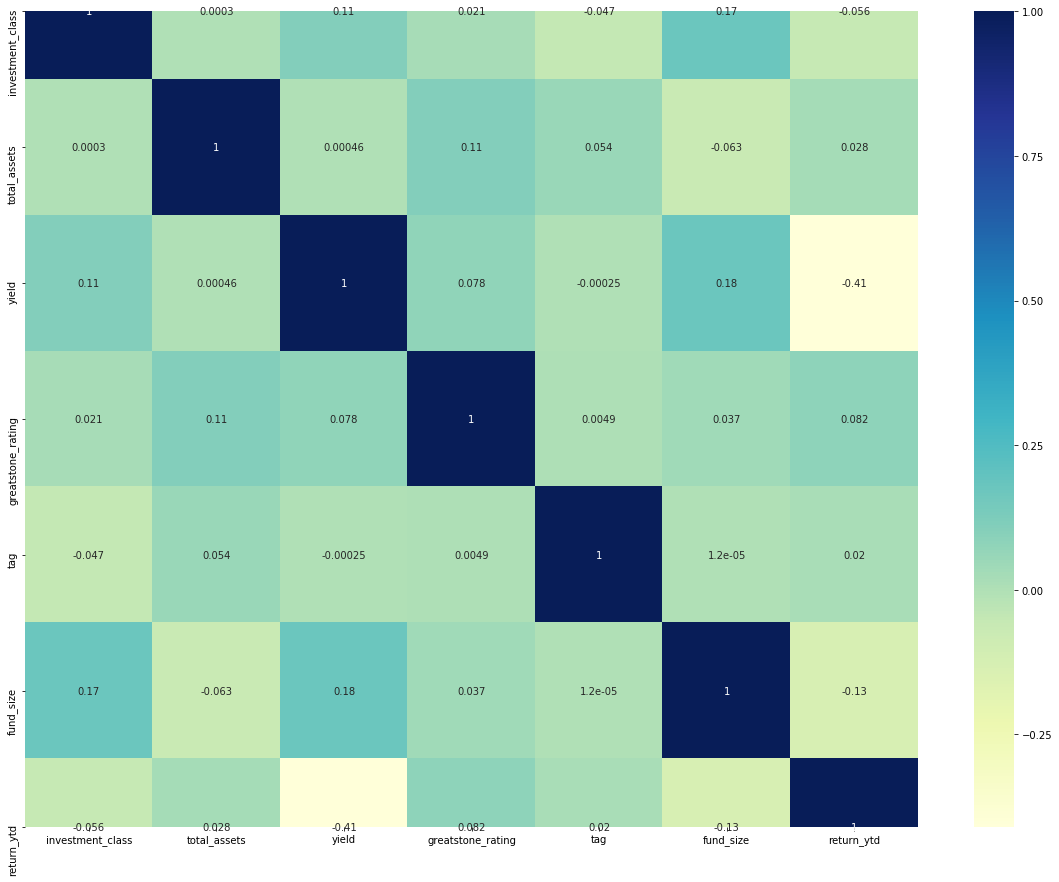

In [26]:
plt.subplots(figsize=(20,15))
sns.heatmap(fund_specs.corr(), annot=True,cmap="YlGnBu")

In [27]:
from scipy.stats import zscore

In [28]:
other_specs.head()

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,pc_ratio,2011_return_category,ytd_return_fund,...,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,NaN,NaN,1.0,-16.32,67922,13.05,1.19,5.91,NaN,20.19,...,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.00,0.00,NaN,NaN
1,10.00,15.34,5.0,-2.09,134783,10.71,0.10,15.95,NaN,16.79,...,-2.62,26.39,3.0,1.06,3.60,2.33,0.00,0.00,NaN,33.92
2,10.00,15.34,26.0,-2.09,61271,10.71,2.00,15.97,-2.46,17.13,...,5.04,25.79,4.0,1.06,3.60,3.77,0.58,0.08,15.53,33.92
3,10.21,14.57,11.0,-8.53,64412,4.48,6.13,8.93,-0.75,11.63,...,-7.54,8.53,3.0,1.00,-4.05,1.46,0.00,0.00,13.66,31.21
4,NaN,NaN,1.0,-7.04,184058,3.17,6.59,7.59,NaN,10.25,...,-7.37,17.52,0.0,0.45,NaN,1.28,24.97,0.02,NaN,NaN


In [29]:
other_specs.isnull().sum()

2014_category_return                  6183
2012_return_category                  9124
years_up                              1812
2018_return_category                   809
tag                                      0
category_return_1year                  115
cash_percent_of_portfolio              114
pc_ratio                               114
2011_return_category                 10533
ytd_return_fund                        115
years_down                            1641
2014_return_fund                      7206
category_return_1month                 115
2013_return_fund                      8538
fund_return_3months                    115
ytd_return_category                    115
pb_ratio                               114
2017_category_return                  1428
1_year_return_fund                     115
pe_ratio                               114
2015_return_fund                      5688
portfolio_convertable                  114
3_months_return_category               115
portfolio_o

In [30]:
other_specs.shape

(25000, 43)

In [31]:
other_specs.dropna(inplace = True )

In [32]:
other_specs.isnull().sum()

2014_category_return                 0
2012_return_category                 0
years_up                             0
2018_return_category                 0
tag                                  0
category_return_1year                0
cash_percent_of_portfolio            0
pc_ratio                             0
2011_return_category                 0
ytd_return_fund                      0
years_down                           0
2014_return_fund                     0
category_return_1month               0
2013_return_fund                     0
fund_return_3months                  0
ytd_return_category                  0
pb_ratio                             0
2017_category_return                 0
1_year_return_fund                   0
pe_ratio                             0
2015_return_fund                     0
portfolio_convertable                0
3_months_return_category             0
portfolio_others                     0
2016_return_fund                     0
mmc                      

In [33]:
other_specs.shape

(9901, 43)

In [34]:
other_specs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2014_category_return,9901.0,5.147552,6.263936,-17.98,1.81,5.18,10.00,44.59
2012_return_category,9901.0,12.616536,5.638730,-23.70,9.40,14.57,15.46,31.78
years_up,9901.0,12.842238,6.655503,1.00,8.00,12.00,15.00,70.00
2018_return_category,9901.0,-6.240881,5.525737,-27.27,-9.27,-5.97,-2.09,7.19
tag,9901.0,141966.134431,64860.674617,26000.00,86111.00,144746.00,197810.00,253709.00
category_return_1year,9901.0,3.161466,4.956729,-10.92,1.56,3.77,5.65,17.48
cash_percent_of_portfolio,9901.0,5.768983,10.364024,0.00,1.04,2.69,5.76,100.00
2011_return_category,9901.0,-1.750637,7.103014,-35.50,-4.07,-1.29,2.01,32.90
ytd_return_fund,9901.0,9.753490,5.671695,-36.30,5.18,10.38,13.59,36.22
years_down,9901.0,4.512574,2.365358,1.00,3.00,4.00,6.00,28.00


In [35]:
other_specs.dtypes

2014_category_return                 float64
2012_return_category                 float64
years_up                             float64
2018_return_category                 float64
tag                                    int64
category_return_1year                float64
cash_percent_of_portfolio            float64
pc_ratio                              object
2011_return_category                 float64
ytd_return_fund                      float64
years_down                           float64
2014_return_fund                     float64
category_return_1month               float64
2013_return_fund                     float64
fund_return_3months                  float64
ytd_return_category                  float64
pb_ratio                             float64
2017_category_return                 float64
1_year_return_fund                   float64
pe_ratio                              object
2015_return_fund                     float64
portfolio_convertable                float64
3_months_r

In [36]:
other_specs.head()

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,pc_ratio,2011_return_category,ytd_return_fund,...,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
2,10.00,15.34,26.0,-2.09,61271,10.71,2.00,15.97,-2.46,17.13,...,5.04,25.79,4.0,1.06,3.60,3.77,0.58,0.08,15.53,33.92
3,10.21,14.57,11.0,-8.53,64412,4.48,6.13,8.93,-0.75,11.63,...,-7.54,8.53,3.0,1.00,-4.05,1.46,0.00,0.00,13.66,31.21
5,6.37,10.92,13.0,-2.11,249560,5.81,1.40,0.0,-5.62,10.69,...,-1.59,16.72,3.0,1.22,-3.67,0.51,0.00,14.97,16.77,21.66
6,1.81,3.87,17.0,-4.03,202778,0.73,28.24,8.67,-2.79,2.43,...,-1.84,1.52,3.0,1.57,-2.58,-0.07,24.23,1.71,5.51,4.16
9,3.54,8.35,13.0,-3.14,62027,2.87,3.32,9.41,2.01,5.99,...,-0.13,5.19,5.0,0.69,-2.07,1.45,82.53,0.00,9.73,4.02


In [37]:
other_specs['pc_ratio']

2        15.97
3         8.93
5          0.0
6         8.67
9         9.41
         ...  
24987     7.17
24989      4.6
24991     5.01
24994      6.7
24995     8.64
Name: pc_ratio, Length: 9901, dtype: object

In [38]:
other_specs['pc_ratio'] = other_specs.apply(lambda x: float(x['pc_ratio'].replace(',', '')),axis=1)

In [39]:
other_specs['pe_ratio'].unique()

array(['23.27', '12.7', '0.0', ..., '20.39', '11.63', '25.8'],
      dtype=object)

In [40]:
other_specs['pe_ratio'] = other_specs.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [41]:
other_specs['mmc'].unique()

array(['68,857.43', '43,266.62', '0', ..., '71,883.76', '27,919.32',
       '298,095.53'], dtype=object)

In [42]:
other_specs['mmc'] = other_specs.apply(lambda x: float(x['mmc'].replace(',', '')),axis=1)

In [43]:
# Please run this if running fresh 
other_specs['ps_ratio'] = other_specs.apply(lambda x: float(x['ps_ratio'].replace(',', '')),axis=1)

In [44]:
other_specs.dtypes

2014_category_return                 float64
2012_return_category                 float64
years_up                             float64
2018_return_category                 float64
tag                                    int64
category_return_1year                float64
cash_percent_of_portfolio            float64
pc_ratio                             float64
2011_return_category                 float64
ytd_return_fund                      float64
years_down                           float64
2014_return_fund                     float64
category_return_1month               float64
2013_return_fund                     float64
fund_return_3months                  float64
ytd_return_category                  float64
pb_ratio                             float64
2017_category_return                 float64
1_year_return_fund                   float64
pe_ratio                             float64
2015_return_fund                     float64
portfolio_convertable                float64
3_months_r

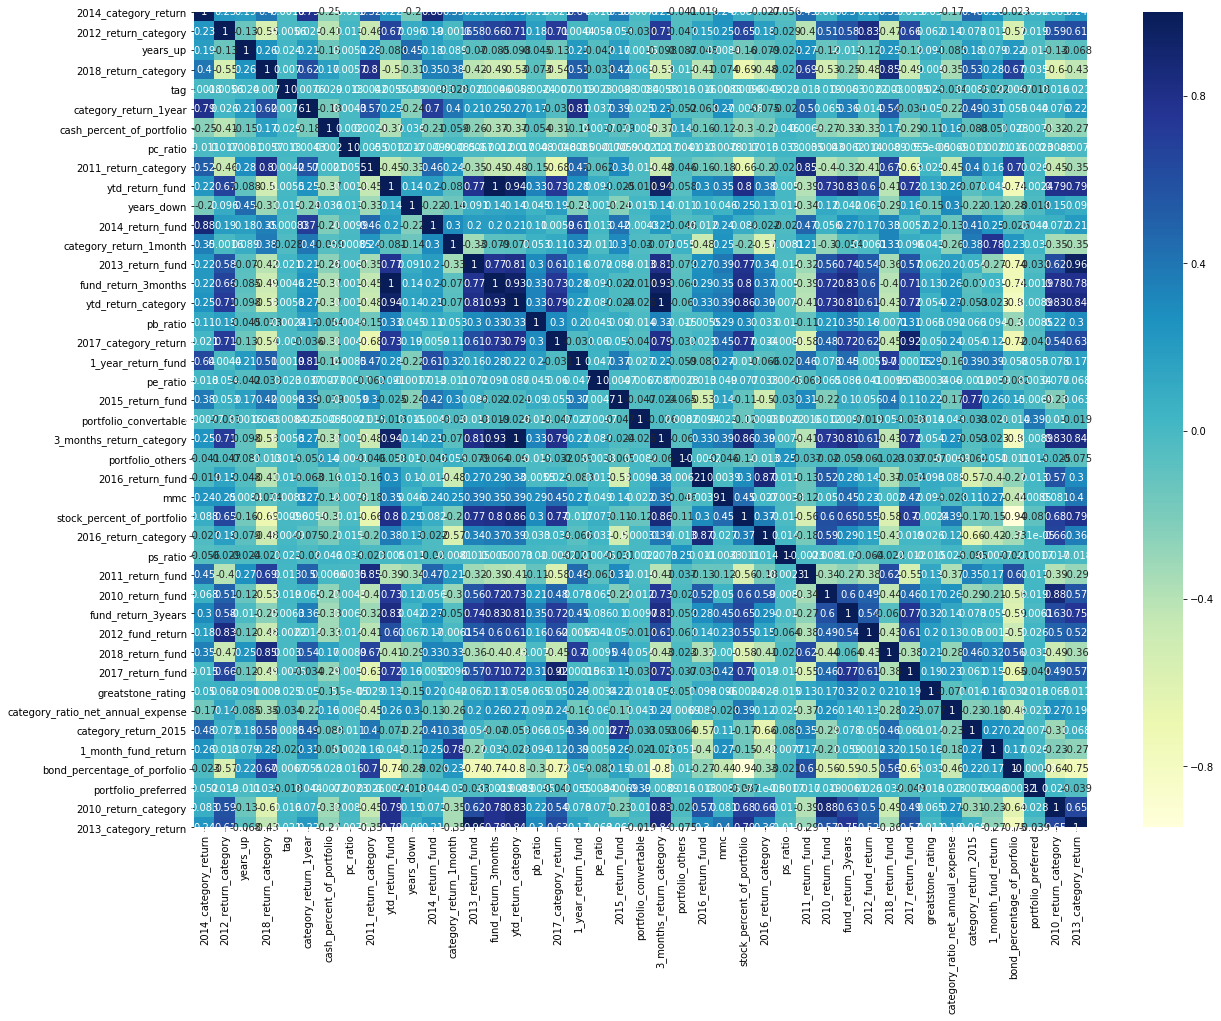

In [45]:
plt.subplots(figsize=(20,15))
sns.heatmap(other_specs.corr(), annot=True,cmap="YlGnBu")

In [46]:
return_3year.head()

,tag,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category
0,67922,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36
1,134783,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35
2,61271,17.88,4.32,0.13,1.46,0.13,1.32,0.85,84.41,9.93,0.01,16.42,0.01,0.01,0.01,0.84,15.35
3,64412,7.93,-2.73,0.11,0.68,0.09,0.58,0.70,81.02,8.36,0.01,6.85,-0.02,0.01,0.01,0.84,10.01
4,184058,NaN,NaN,0.08,NaN,0.06,NaN,NaN,NaN,NaN,0.01,0.00,-0.01,0.01,0.01,0.97,9.13


In [47]:
return_3year.isnull().sum()

tag                                       0
3yrs_treynor_ratio_fund                1648
3_years_alpha_fund                     1648
3years_category_std                     106
3yrs_sharpe_ratio_fund                 1648
3yrs_treynor_ratio_category             106
3_years_return_mean_annual_fund        1648
fund_beta_3years                       1648
3years_fund_r_squared                  1648
3years_fund_std                        1648
category_beta_3years                    106
fund_return_3years                      115
3_years_alpha_category                  106
3_years_return_mean_annual_category     106
3yrs_sharpe_ratio_category              106
3years_category_r_squared               106
3_years_return_category                 115
dtype: int64

In [48]:
return_3year.shape

(25000, 17)

In [49]:
return_3year.dropna(inplace = True )

In [50]:
return_3year.shape

(23299, 17)

In [51]:
return_3year.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tag,23299.0,139903.845873,65987.841533,26000.00,82641.500,139634.00,197832.500,253763.00
3_years_alpha_fund,23299.0,-0.572444,3.375948,-36.24,-2.100,-0.58,0.895,19.15
3years_category_std,23299.0,0.089129,0.048328,0.00,0.040,0.10,0.130,0.33
3yrs_sharpe_ratio_fund,23299.0,0.683388,0.462059,-4.39,0.440,0.74,0.970,4.16
3yrs_treynor_ratio_category,23299.0,0.070010,0.069282,-0.76,0.050,0.06,0.100,0.30
3_years_return_mean_annual_fund,23299.0,0.637201,0.435689,-3.19,0.330,0.62,0.890,2.98
fund_beta_3years,23299.0,0.910343,0.636664,-39.66,0.770,0.98,1.140,22.57
3years_fund_r_squared,23299.0,72.586511,27.180694,0.00,64.345,81.93,92.700,100.00
3years_fund_std,23299.0,9.052994,5.126267,0.18,4.300,9.66,12.420,50.49
category_beta_3years,23299.0,0.008770,0.003694,-0.01,0.010,0.01,0.010,0.03


In [52]:
return_3year.dtypes

tag                                      int64
3yrs_treynor_ratio_fund                 object
3_years_alpha_fund                     float64
3years_category_std                    float64
3yrs_sharpe_ratio_fund                 float64
3yrs_treynor_ratio_category            float64
3_years_return_mean_annual_fund        float64
fund_beta_3years                       float64
3years_fund_r_squared                  float64
3years_fund_std                        float64
category_beta_3years                   float64
fund_return_3years                     float64
3_years_alpha_category                 float64
3_years_return_mean_annual_category    float64
3yrs_sharpe_ratio_category             float64
3years_category_r_squared              float64
3_years_return_category                float64
dtype: object

In [53]:
return_3year['3yrs_treynor_ratio_fund'].unique()

array(['2.46', '12.2', '17.88', ..., '-3.45', '-20.09', '72.41'],
      dtype=object)

In [54]:
return_3year['3yrs_treynor_ratio_fund'] = return_3year.apply(lambda x: float(x['3yrs_treynor_ratio_fund'].replace(',', '')),axis=1)

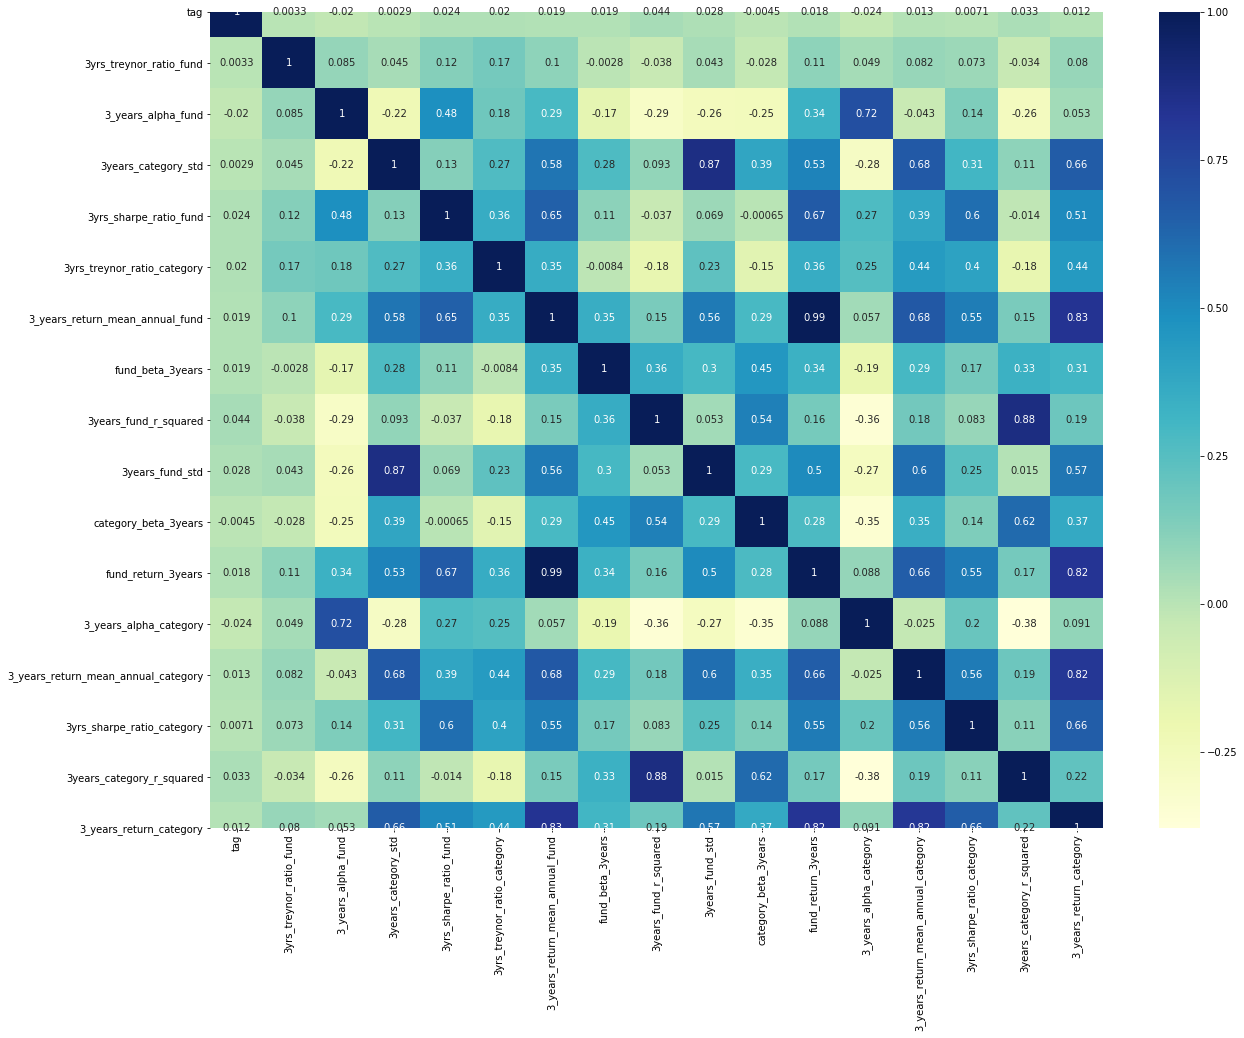

In [55]:
plt.subplots(figsize=(20,15))
sns.heatmap(return_3year.corr(), annot=True,cmap="YlGnBu")

In [56]:
return_5year.head()

,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,tag,5_years_return_category
0,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,67922,-4.25
1,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,134783,11.26
2,0.86,1.15,2.96,89.02,10.28,0.01,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,61271,11.26
3,0.86,0.77,-0.50,82.36,8.53,0.01,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,64412,7.20
4,0.96,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,184058,5.95


In [57]:
return_5year.isna().sum()

category_r_squared_5years               106
5yrs_sharpe_ratio_fund                 3843
5_years_alpha_fund                     3843
5years_fund_r_squared                  3843
5years_fund_std                        3843
5yrs_sharpe_ratio_category              106
5_years_beta_fund                      3843
5yrs_treynor_ratio_fund                3843
5_years_return_mean_annual_fund        3843
5_years_return_mean_annual_category     106
5yrs_treynor_ratio_category             106
5_years_return_fund                     115
5_years_alpha_category                  106
5_years_beta_category                   106
5years_category_std                     106
tag                                       0
5_years_return_category                 115
dtype: int64

In [58]:
return_5year.dropna(inplace = True )

In [59]:
return_5year.shape

(21114, 17)

In [60]:
return_5year.dtypes

category_r_squared_5years              float64
5yrs_sharpe_ratio_fund                 float64
5_years_alpha_fund                     float64
5years_fund_r_squared                  float64
5years_fund_std                        float64
5yrs_sharpe_ratio_category             float64
5_years_beta_fund                      float64
5yrs_treynor_ratio_fund                 object
5_years_return_mean_annual_fund        float64
5_years_return_mean_annual_category    float64
5yrs_treynor_ratio_category            float64
5_years_return_fund                    float64
5_years_alpha_category                 float64
5_years_beta_category                  float64
5years_category_std                    float64
tag                                      int64
5_years_return_category                float64
dtype: object

In [61]:
return_5year['5yrs_treynor_ratio_fund'].unique()

array(['10.37', '13.84', '9.3', ..., '-3.09', '144.88', '36.29'],
      dtype=object)

In [62]:
return_5year['5yrs_treynor_ratio_fund'] = return_5year.apply(lambda x: float(x['5yrs_treynor_ratio_fund'].replace(',', '')),axis=1)

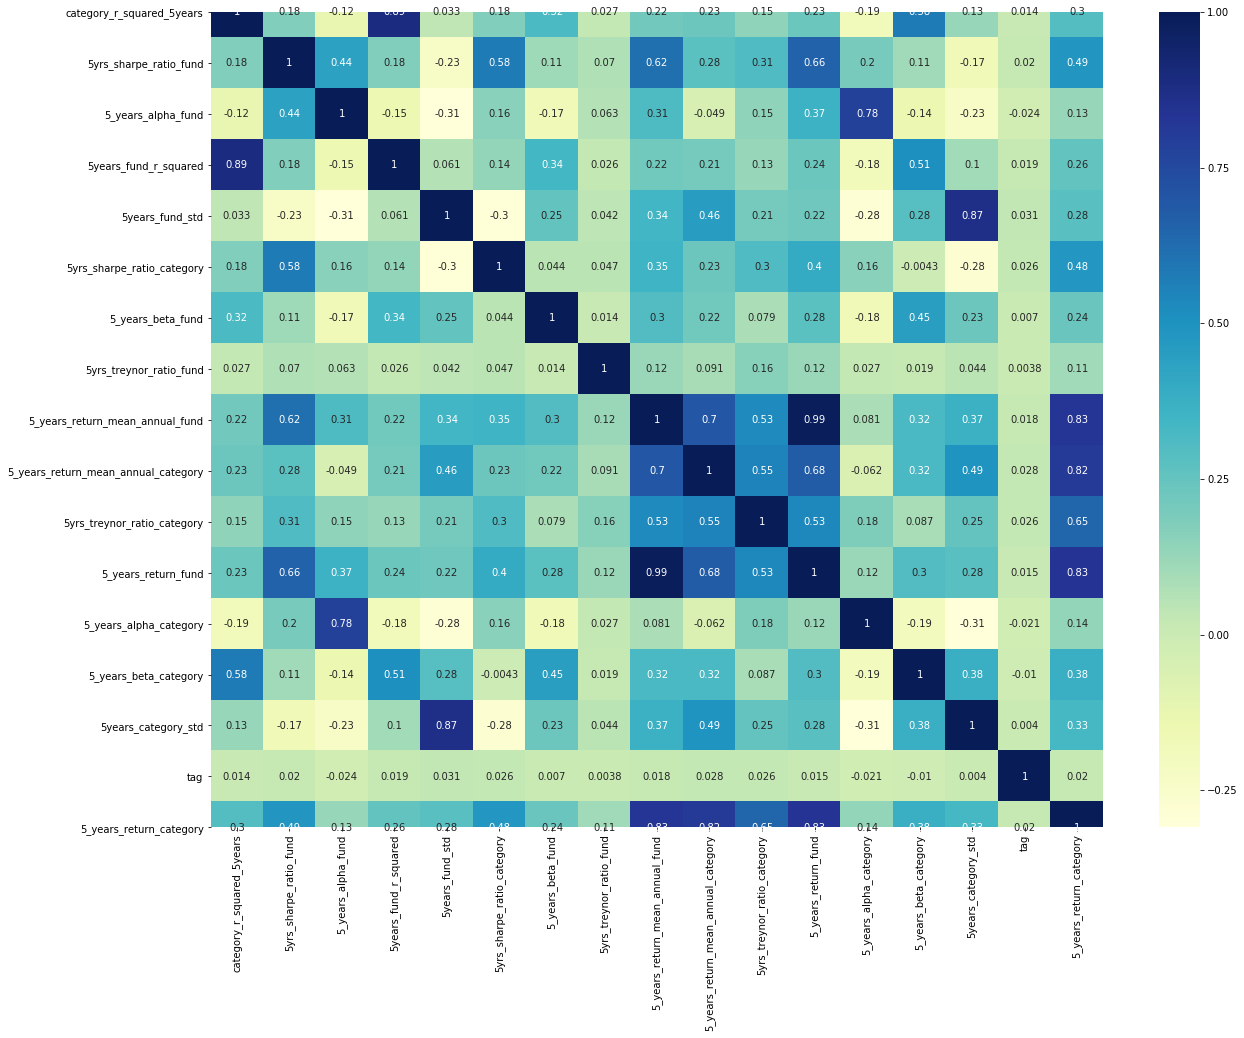

In [63]:
plt.subplots(figsize=(20,15))
sns.heatmap(return_5year.corr(), annot=True,cmap="YlGnBu")

In [64]:
return_10year.head()

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,fund_id,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,f5ad58c2-fdea-4087-8678-e04744f89f90,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,0.88,1.22,1.00,90.69,12.68,0.01,0.95,16.58,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94
3,0.90,1.20,0.75,89.03,11.21,0.01,0.84,16.38,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68
4,0.97,NaN,NaN,NaN,NaN,0.01,NaN,NaN,63d8406d-c525-494a-8e03-d4fc4cfcb571,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,11.53


In [65]:
return_10year.isna().sum()

10years_category_r_squared               106
10yrs_sharpe_ratio_fund                 8584
10_years_alpha_fund                     8584
10years_fund_r_squared                  8584
10years_fund_std                        8584
10yrs_sharpe_ratio_category              106
10_years_beta_fund                      8584
10yrs_treynor_ratio_fund                8584
fund_id                                    0
10_years_return_mean_annual_category     106
10yrs_treynor_ratio_category             106
10_years_return_fund                     115
10_years_alpha_category                  106
10_years_beta_category                   106
10years_category_std                     106
10_years_return_mean_annual_fund        8584
10_years_return_category                 115
dtype: int64

In [66]:
return_10year.dropna(inplace = True )

In [67]:
return_10year.shape

(16378, 17)

In [68]:
return_10year.dtypes

10years_category_r_squared              float64
10yrs_sharpe_ratio_fund                 float64
10_years_alpha_fund                     float64
10years_fund_r_squared                  float64
10years_fund_std                        float64
10yrs_sharpe_ratio_category             float64
10_years_beta_fund                      float64
10yrs_treynor_ratio_fund                 object
fund_id                                  object
10_years_return_mean_annual_category    float64
10yrs_treynor_ratio_category            float64
10_years_return_fund                    float64
10_years_alpha_category                 float64
10_years_beta_category                  float64
10years_category_std                    float64
10_years_return_mean_annual_fund        float64
10_years_return_category                float64
dtype: object

In [69]:
return_10year['10yrs_treynor_ratio_fund'] = return_10year.apply(lambda x: float(x['10yrs_treynor_ratio_fund'].replace(',', '')),axis=1)

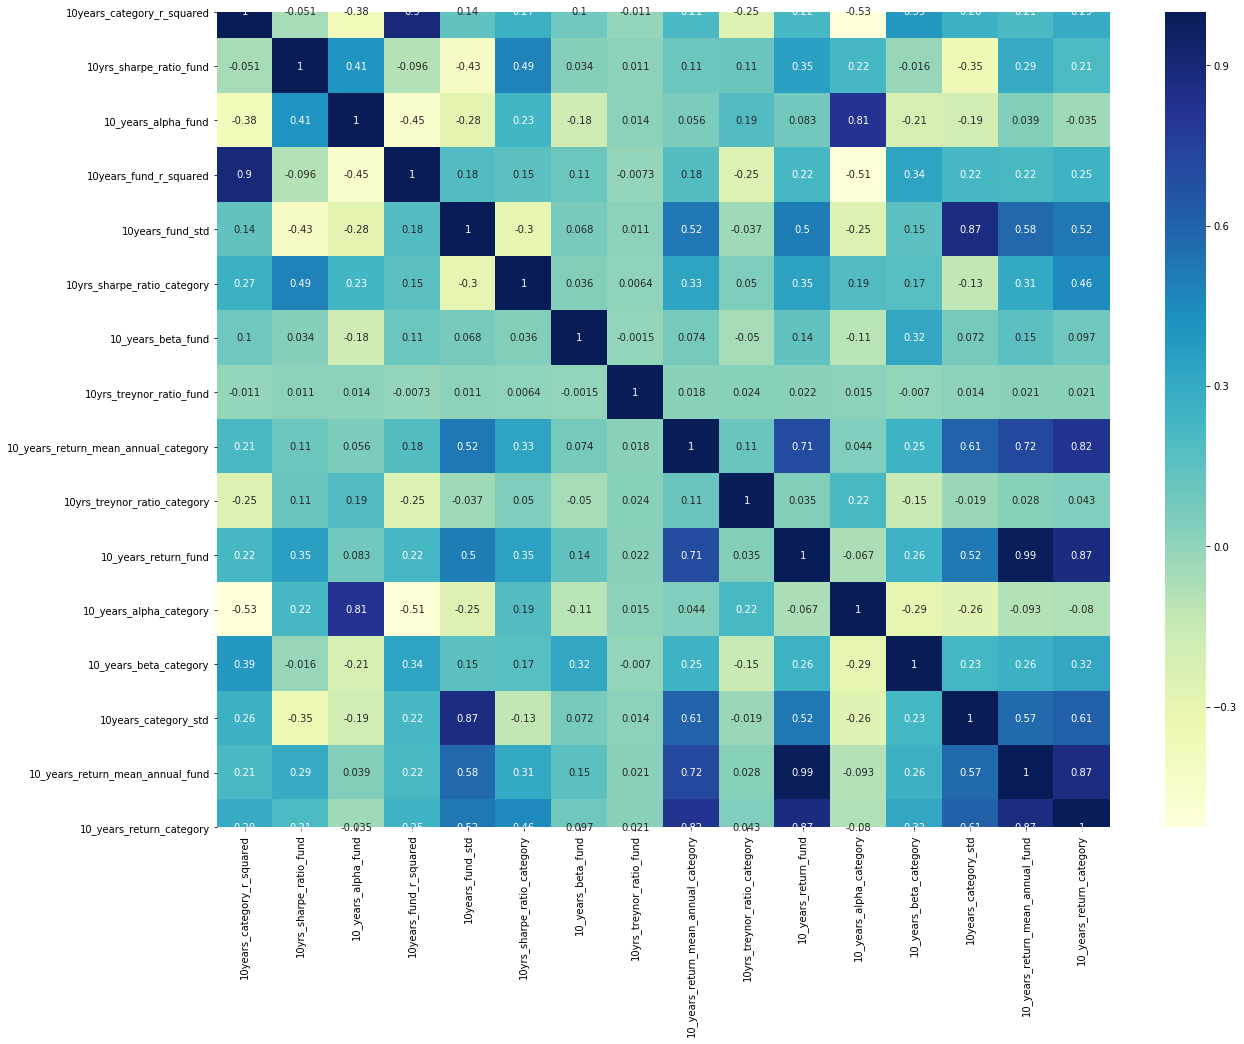

In [70]:
plt.subplots(figsize=(20,15))
sns.heatmap(return_10year.corr(), annot=True,cmap="YlGnBu")

In [71]:
bond_ratings.head()

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.0,0.0,0.0,0.0,NaN,0.0,67922,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN,0.0,134783,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN,0.0,61271,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN,0.0,64412,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,NaN,0.0,184058,0.0,0.0,0.0,0.0,NaN


In [72]:
bond_ratings.isna().sum()

bb_rating                114
us_govt_bond_rating      114
below_b_rating           114
others_rating            114
maturity_bond          16907
b_rating                 114
tag                        0
a_rating                 114
aaa_rating               114
aa_rating                114
bbb_rating               114
duration_bond          15126
dtype: int64

In [73]:
bond_ratings.dropna(inplace = True )

In [74]:
bond_ratings.shape

(7946, 12)

In [75]:
bond_ratings.dtypes

bb_rating              float64
us_govt_bond_rating    float64
below_b_rating         float64
others_rating          float64
maturity_bond          float64
b_rating               float64
tag                      int64
a_rating               float64
aaa_rating             float64
aa_rating              float64
bbb_rating             float64
duration_bond          float64
dtype: object

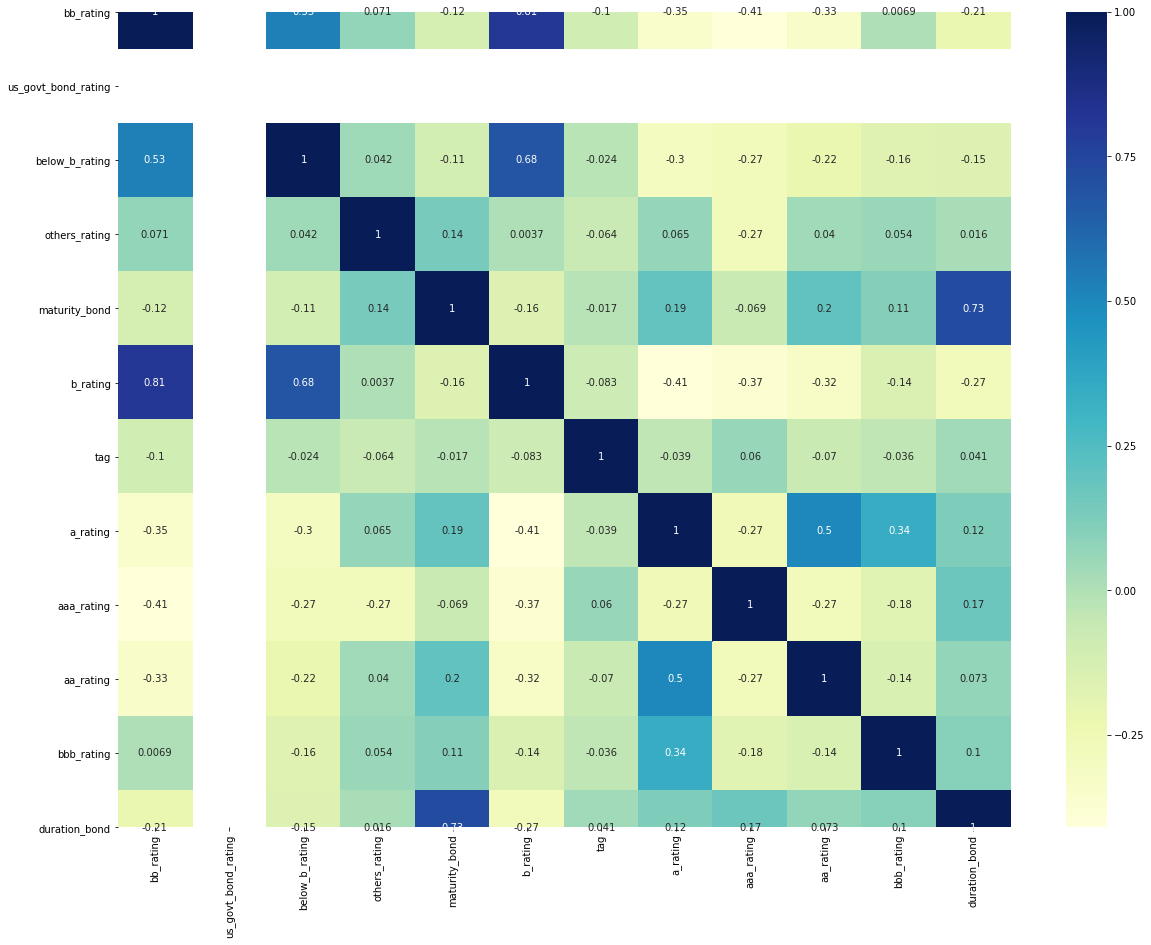

In [76]:
plt.subplots(figsize=(20,15))
sns.heatmap(bond_ratings.corr(), annot=True,cmap="YlGnBu")

In [77]:
fund_allocations.head()

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38
2,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09
3,6.53,13.80,10.91,0.16,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43
4,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95


In [78]:
fund_allocations.isna().sum()

portfolio_communication_allocation        114
portfolio_financial_services              114
portfolio_industrials_allocation          114
portfolio_tech_allocation                 114
portfolio_materials_basic_allocation      114
portfolio_energy_allocation               114
portfolio_consumer_defence_allocation     114
portfolio_healthcare_allocation           114
portfolio_property_allocation             114
id                                          0
portfolio_utils_allocation                114
portfolio_cyclical_consumer_allocation    114
dtype: int64

In [79]:
fund_allocations.dropna(inplace = True )
fund_allocations.shape

(24886, 12)

In [80]:
fund_allocations.dtypes

portfolio_communication_allocation        float64
portfolio_financial_services              float64
portfolio_industrials_allocation          float64
portfolio_tech_allocation                 float64
portfolio_materials_basic_allocation      float64
portfolio_energy_allocation               float64
portfolio_consumer_defence_allocation     float64
portfolio_healthcare_allocation           float64
portfolio_property_allocation             float64
id                                          int64
portfolio_utils_allocation                float64
portfolio_cyclical_consumer_allocation    float64
dtype: object

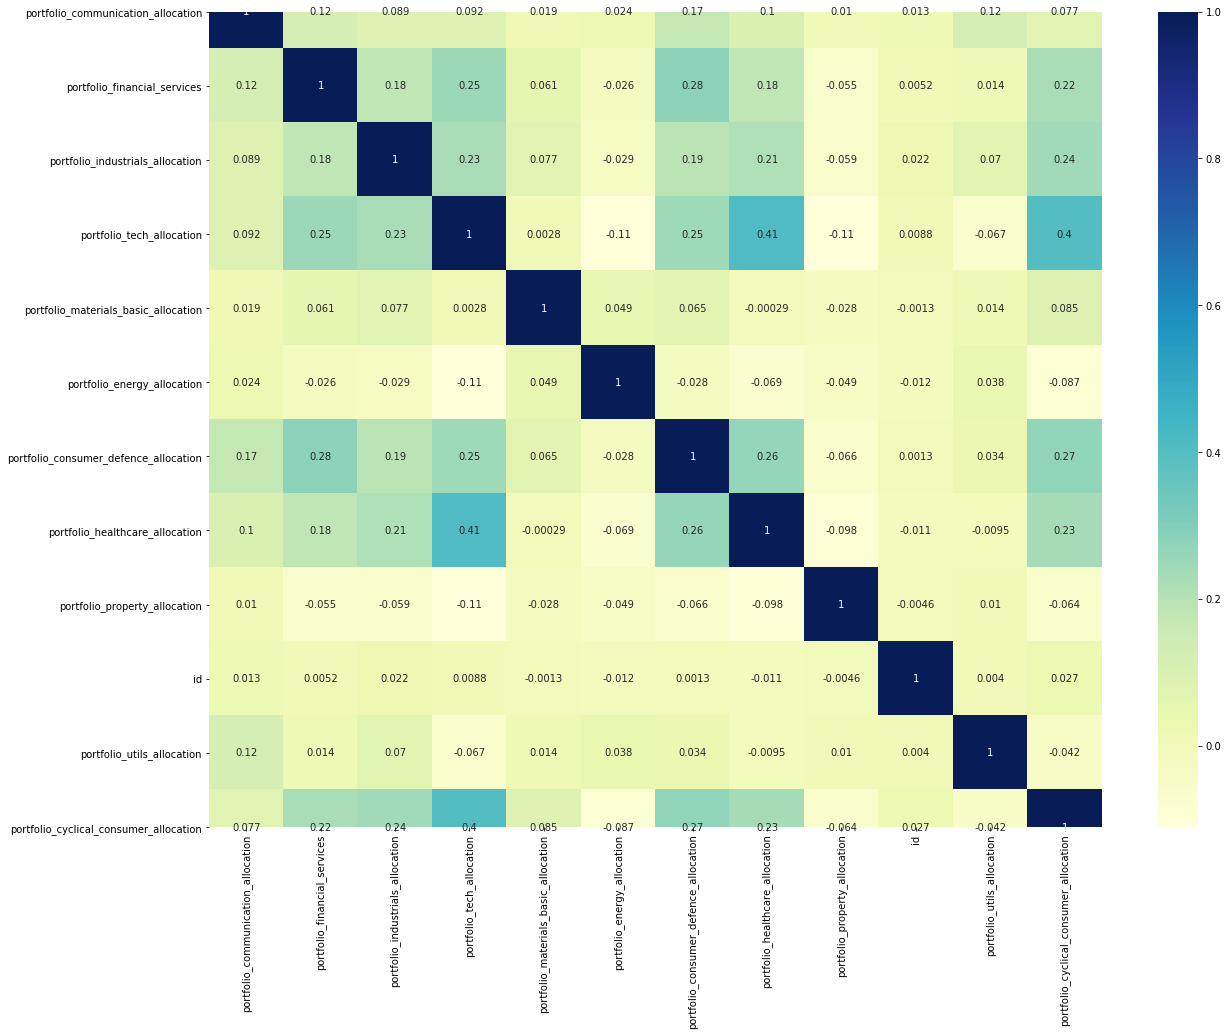

In [81]:
plt.subplots(figsize=(20,15))
sns.heatmap(fund_allocations.corr(), annot=True,cmap="YlGnBu")

In [82]:
fund_config.head()

,category,parent_company,fund_id,fund_name
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3


In [83]:
fund_config.isna().sum()

category          0
parent_company    0
fund_id           0
fund_name         0
dtype: int64

In [84]:
fund_config.dtypes

category          object
parent_company    object
fund_id           object
fund_name         object
dtype: object

In [85]:
fund_config['category'].unique()

array(['Energy Limited Partnership', 'Large Growth', 'Large Value',
       'Target-Date 2035', 'Convertibles', 'Multialternative',
       'Foreign Large Value', 'Allocation - 15% to 30% Equity',
       'Long-Short Credit', 'Large Blend', 'Muni National Long',
       'Emerging Markets Bond', 'Muni Pennsylvania', 'Target-Date 2055',
       'Small Growth', 'Muni New York Intermediate', 'Corporate Bond',
       'Short-Term Bond', 'Foreign Large Blend', 'High Yield Bond',
       'Target-Date 2050', 'Muni National Short',
       'Allocation - 50% to 70% Equity', 'Market Neutral',
       'Long-Term Bond', 'Intermediate-Term Bond', 'World Allocation',
       'Mid-Cap Growth', 'Muni Minnesota', 'Allocation - 85%+ Equity',
       'Target-Date 2030', 'Target-Date Retirement', 'Multisector Bond',
       'Muni National Interm', 'Target-Date 2025', 'World Large Stock',
       'Foreign Small/Mid Value', 'Allocation - 30% to 50% Equity',
       'Technology', 'Europe Stock', 'Global Real Estate',
     

In [86]:
fund_ratios.head()

,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,"19,857.41",5.91,14.51
1,f5ad58c2-fdea-4087-8678-e04744f89f90,134783,0.58,5.30,3.38,"72,347.03",15.95,18.88
2,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,61271,0.99,5.40,3.67,"68,857.43",15.97,23.27
3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,64412,0.52,2.23,1.63,"43,266.62",8.93,12.7
4,63d8406d-c525-494a-8e03-d4fc4cfcb571,184058,0.75,2.02,1.4,"43,747.9",7.59,14.74


In [87]:
fund_ratios.isna().sum()

fund_id                            0
tag                                0
fund_ratio_net_annual_expense      0
pb_ratio                         114
ps_ratio                         114
mmc                              114
pc_ratio                         114
pe_ratio                         114
dtype: int64

In [88]:
fund_ratios.dropna(inplace = True )
fund_ratios.shape

(24886, 8)

In [89]:
fund_ratios.dtypes

fund_id                           object
tag                                int64
fund_ratio_net_annual_expense    float64
pb_ratio                         float64
ps_ratio                          object
mmc                               object
pc_ratio                          object
pe_ratio                          object
dtype: object

In [90]:
fund_ratios['ps_ratio'] = fund_ratios.apply(lambda x: float(x['ps_ratio'].replace(',', '')),axis=1)

In [91]:
fund_ratios['mmc'] = fund_ratios.apply(lambda x: float(x['mmc'].replace(',', '')),axis=1)

In [92]:
fund_ratios['pc_ratio'] = fund_ratios.apply(lambda x: float(x['pc_ratio'].replace(',', '')),axis=1)

In [93]:
fund_ratios['pe_ratio'] = fund_ratios.apply(lambda x: float(x['pe_ratio'].replace(',', '')),axis=1)

In [94]:
fund_ratios.dtypes

fund_id                           object
tag                                int64
fund_ratio_net_annual_expense    float64
pb_ratio                         float64
ps_ratio                         float64
mmc                              float64
pc_ratio                         float64
pe_ratio                         float64
dtype: object

In [95]:
rating.head()

,fund_id,greatstone_rating
0,85a6edf9-db47-490c-981a-168ce90434bb,NaN
1,654dac08-5e5d-4cf0-870e-3167087de7d2,NaN
2,75214019-f876-42a9-a316-328b759ac4ba,NaN
3,1fe8de6d-cd33-489e-a829-211f1f622eed,NaN
4,bd87a7a0-6ca5-4607-a0cf-d396ecd6037a,NaN


In [96]:
print(fund_specs.shape)


(18694, 7)


In [99]:
print(fund_specs.shape)
print(other_specs.shape)
print(return_3year.shape)
print(return_5year.shape)
print(return_10year.shape)
print(bond_ratings.shape)
print(fund_allocations.shape)
print(fund_config.shape)
print(fund_ratios.shape)
print(rating.shape)

(18694, 7)
(9901, 43)
(23299, 17)
(21114, 17)
(16378, 17)
(7946, 12)
(24886, 12)
(25000, 4)
(24886, 8)
(5000, 2)


In [114]:
m1 = fund_specs.merge(other_specs, on='tag')

In [115]:
m2 = m1.merge(return_3year, on='tag')

In [116]:
m3 = m2.merge(return_5year, on='tag')

In [117]:
m4 = m3.merge(bond_ratings, on='tag')

In [118]:
m5 = m4.merge(fund_ratios, on='tag')

In [119]:
fund_allocations.rename(columns={'id': 'tag'}, inplace=True)
m6 = m5.merge(fund_allocations, on= 'tag')

In [120]:
m7 = m6.merge(return_10year, on = 'fund_id')

In [121]:
m8 = m7.merge(fund_config, on = 'fund_id')

In [122]:
m8.shape

(2894, 129)

In [143]:
m8 = m8.drop('fund_id',axis=1)

In [146]:
m8 = m8.drop('category',axis=1)

In [147]:
m8 = m8.drop('parent_company',axis=1)

In [148]:
m8 = m8.drop('fund_name',axis=1)

In [149]:
X=m8.drop('greatstone_rating_x',axis=1)
y=m8['greatstone_rating_x']

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [157]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [158]:
from sklearn.metrics import accuracy_score
y_predict = dtc.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=51)
knn=RandomForestClassifier(n_estimators=100,random_state=10)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))
print("The Metrics are")
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(f1_score(y_test,predicted,average=None))

What is the Testing Accuracy
0.9499136442141624
What is the Training Accuracy
1.0
[[  1   0   0   0   0   0]
 [  0  22   9   0   0   0]
 [  0   1 123   3   0   0]
 [  0   0   1 208   0   0]
 [  0   0   0   6 149   0]
 [  0   0   0   0   9  47]]
The Metrics are
[1.         0.95652174 0.92481203 0.95852535 0.94303797 1.        ]
[1.         0.70967742 0.96850394 0.99521531 0.96129032 0.83928571]
[1.         0.81481481 0.94615385 0.97652582 0.95207668 0.91262136]


In [151]:
from sklearn.model_selection import cross_val_score
scoresrf = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [152]:
print(scoresrf)

[0.9556314  0.94863014 0.92413793 0.94827586 0.9550173  0.95847751
 0.95847751 0.96180556 0.96864111 0.93379791]


In [153]:
import numpy as np
print("Variance Error")
print(print(np.std(scoresrf)))
print("Bias Error")
print(1-np.mean(scoresrf))

Variance Error
0.012677015252501003
None
Bias Error
0.04871077723079442


In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
knn = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=10)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
1.0
What is the Training Accuracy
1.0
[[ 38   0   0   0   0]
 [  0 123   0   0   0]
 [  0   0 214   0   0]
 [  0   0   0 148   0]
 [  0   0   0   0  56]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00       123
         3.0       1.00      1.00      1.00       214
         4.0       1.00      1.00      1.00       148
         5.0       1.00      1.00      1.00        56

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



In [155]:
from sklearn.model_selection import cross_val_score
knn = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=10)
scoresrf = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scoresrf)

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
